<a href="https://colab.research.google.com/github/vikiysr/mlprojects/blob/main/sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Libraries and dependencies

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from xgboost import XGBRegressor
from sklearn.preprocessing import OneHotEncoder


Loading the features dataset

In [ ]:
df = pd.read_csv('/content/train.csv')

loading the Test data set and merging the two  dataframes

In [ ]:
test_df = pd.read_csv('/content/test.csv')
df = pd.merge(df, test_df.drop(['IsHoliday'], axis = 1), how = 'left', on = ['Store', 'Date',"Dept"])

Preview of the new dataframe

In [ ]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


Load store dataset and join with above data

In [ ]:
stores_df = pd.read_csv('/content/stores.csv')


merging the store dataset with our dataframe

In [ ]:
df = pd.merge(df, stores_df, how = 'left', on = ['Store'])

Preview of updated dataframe

In [ ]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size
0,1,1,2010-02-05,24924.50,False,A,151315
1,1,1,2010-02-12,46039.49,True,A,151315
2,1,1,2010-02-19,41595.55,False,A,151315
3,1,1,2010-02-26,19403.54,False,A,151315
4,1,1,2010-03-05,21827.90,False,A,151315


Dimensions of dataframe

In [ ]:
df.shape

(421570, 7)

Description of the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Type          421570 non-null  object 
 6   Size          421570 non-null  int64  
dtypes: bool(1), float64(1), int64(3), object(2)
memory usage: 22.9+ MB


Statistical measures of the dataset

In [ ]:
df["Weekly_Sales"].describe()

count    421570.000000
mean      15981.258123
std       22711.183519
min       -4988.940000
25%        2079.650000
50%        7612.030000
75%       20205.852500
max      693099.360000
Name: Weekly_Sales, dtype: float64

Time range between starting and ending dates

In [ ]:
print('Min Date in Data is - {}'.format(df['Date'].min()))
print('Max Date in Data is - {}'.format(df['Date'].max()))

Min Date in Data is - 2010-02-05
Max Date in Data is - 2012-10-26


Store-type wise pie chart

  Type  Store
0    A     22
1    B     17
2    C      6


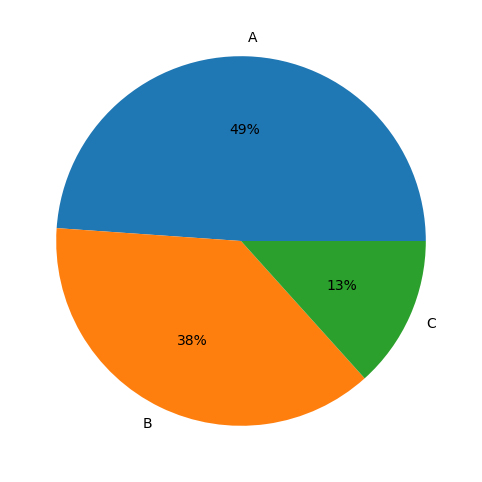

In [ ]:
temp = pd.DataFrame(df.groupby('Type')['Store'].nunique()).reset_index()
print(temp)
plt.figure(figsize = (12,6))
plt.pie(temp['Store'], labels = temp['Type'], autopct = '%.0f%%')
plt.show()


size distribution of stores for each store type

<Axes: xlabel='Type', ylabel='Size'>

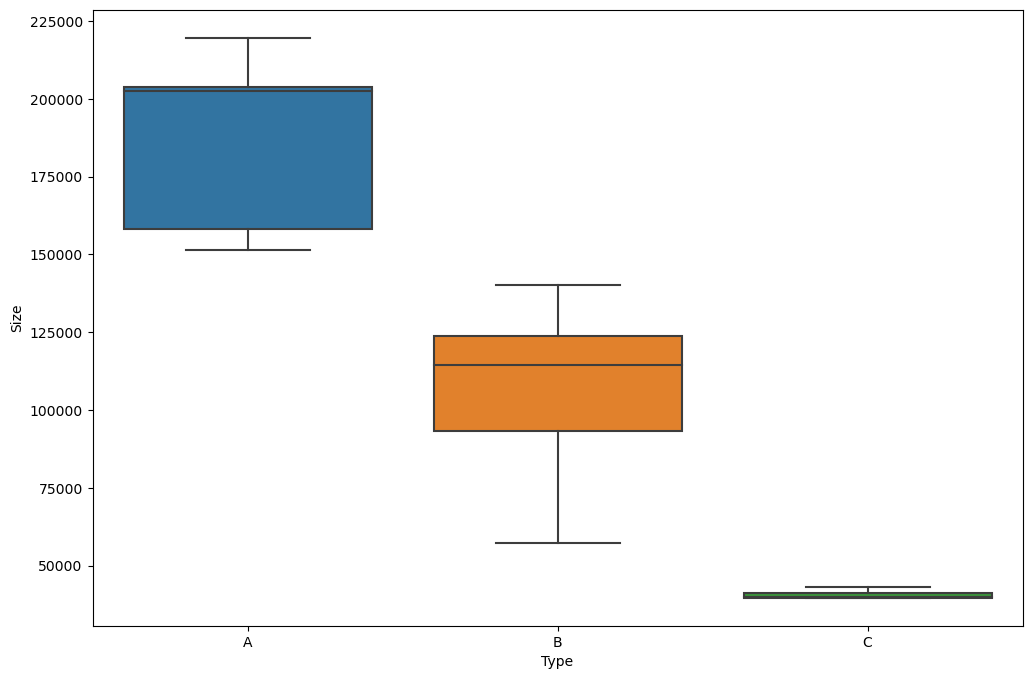

In [ ]:
plt.figure(figsize = (12,8))
sns.boxplot(x = 'Type', y ='Size', data = df, showfliers = False)

Distribution of weekly sales based on store type

<Axes: xlabel='Type', ylabel='Weekly_Sales'>

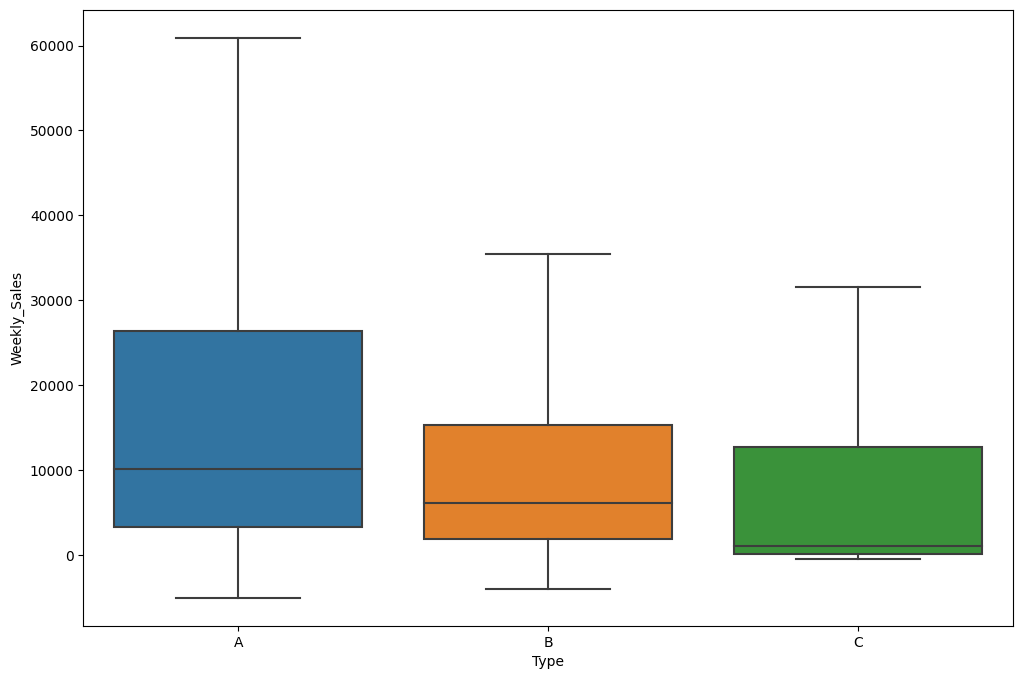

In [ ]:
plt.figure(figsize = (12,8))
sns.boxplot(x = 'Type', y ='Weekly_Sales', data = df, showfliers = False)


Impact of holidays on weekly sales

<Axes: xlabel='IsHoliday', ylabel='Weekly_Sales'>

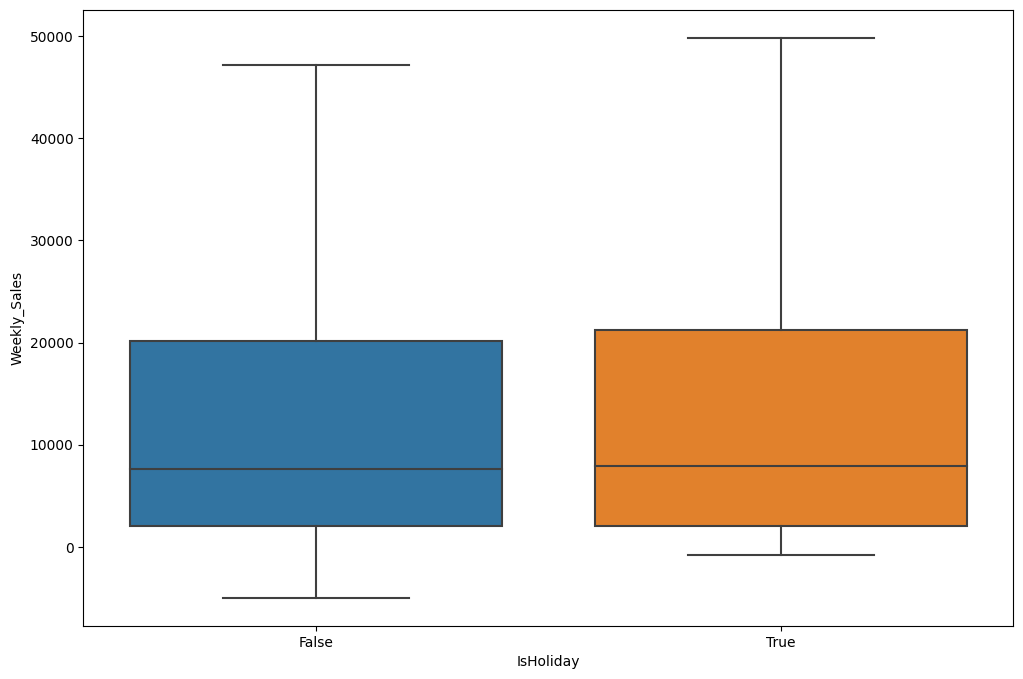

In [ ]:
plt.figure(figsize = (12,8))
sns.boxplot(x = 'IsHoliday', y ='Weekly_Sales', data = df, showfliers = False)


In [ ]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size
0,1,1,2010-02-05,24924.50,False,A,151315
1,1,1,2010-02-12,46039.49,True,A,151315
2,1,1,2010-02-19,41595.55,False,A,151315
3,1,1,2010-02-26,19403.54,False,A,151315
4,1,1,2010-03-05,21827.90,False,A,151315


One Hot Encoding of DataFrame

In [ ]:
cols_to_encode = ['Type', 'IsHoliday']
df = pd.get_dummies(data = df, columns = cols_to_encode, drop_first = True)

Preview of dataframe after One Hot Encoding

In [ ]:
df.head()

,Store,Dept,Date,Weekly_Sales,Size,Type_B,Type_C,IsHoliday_True
0,1,1,2010-02-05,24924.50,151315,0,0,0
1,1,1,2010-02-12,46039.49,151315,0,0,1
2,1,1,2010-02-19,41595.55,151315,0,0,0
3,1,1,2010-02-26,19403.54,151315,0,0,0
4,1,1,2010-03-05,21827.90,151315,0,0,0


Standardizing the Independent Features

In [ ]:
standard_scaler = StandardScaler()
cols1 = ['Store','Dept','Type_B','Type_C','IsHoliday_True', 'Size']
df_transformed = standard_scaler.fit_transform(df[cols1])
X=df_transformed
y=df["Weekly_Sales"]

Splitting the train and test data from the dataset

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2,random_state = 1)

Predicting the output through KNNregressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn_regressor = KNeighborsRegressor(n_neighbors = 10, n_jobs = 4)
knn_regressor.fit(x_train, y_train)
y_pred = knn_regressor.predict(x_test)


Evaluating the Performance of our model

In [ ]:
print(f'MAE is : {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}')
print(f'Accuracy Score is : {knn_regressor.score(x_test, y_test)}')

MAE is : 2671.076328545811
RMSE is : 6850.342180580748
Accuracy Score is : 0.8923669623741247


Predicting the output with different models

In [ ]:
from sklearn.tree import DecisionTreeRegressor
decision_tree_regressor = DecisionTreeRegressor(random_state = 1)
decision_tree_regressor.fit(x_train, y_train)
y_pred = decision_tree_regressor.predict(x_test)

print(f'MAE is : {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}')
print(f'Accuracy Score is : {decision_tree_regressor.score(x_test, y_test)}')


MAE is : 2671.0914815001306
RMSE is : 6850.345281793474
Accuracy Score is : 0.9093421448809983


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators = 400, max_depth = 15, random_state = 1234, n_jobs = 5)
rf_regressor.fit(x_train, y_train)
y_pred = rf_regressor.predict(x_test)

print(f'MAE is - {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'RMSE is - {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}')
print(f'Accuracy Score is - {rf_regressor.score(x_test, y_test)}')


MAE is - 2794.229534426433
RMSE is - 6907.3483574901575
Accuracy Score is - 0.9078271036943059


In [ ]:
xgb_regressor = XGBRegressor(objective = 'reg:linear', n_estimators = 500, max_depth = 6, nthread = 4, learning_rate = 0.5, random_state = 1234)
xgb_regressor.fit(x_train, y_train)
y_pred = xgb_regressor.predict(x_test)

print(f'MAE is : {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}')
print(f'Accuracy Score is : {xgb_regressor.score(x_test, y_test)}')


[02:22:29] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
MAE is : 2672.6229807651457
RMSE is : 6828.379856415531
Accuracy Score is : 0.9099225961390291


XgboostRegressor gives the highest accuracy score of 91% approximately.

Scatter plot showing the relationship between independent features and Weekly_Sales 

In [ ]:
df.head()

,Store,Dept,Date,Weekly_Sales,Size,Type_B,Type_C,IsHoliday_True
0,1,1,2010-02-05,24924.50,151315,0,0,0
1,1,1,2010-02-12,46039.49,151315,0,0,1
2,1,1,2010-02-19,41595.55,151315,0,0,0
3,1,1,2010-02-26,19403.54,151315,0,0,0
4,1,1,2010-03-05,21827.90,151315,0,0,0


<Axes: xlabel='Weekly_Sales'>

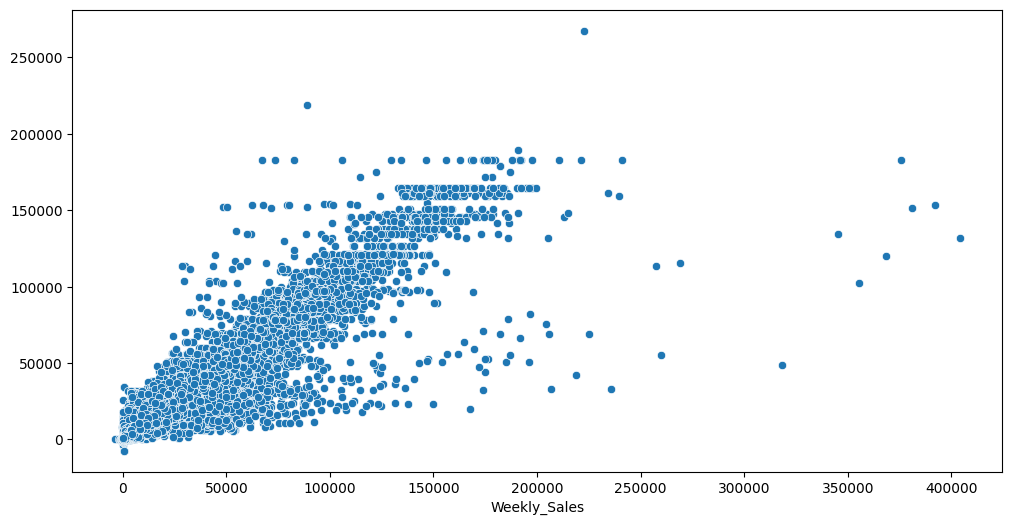

In [ ]:
plt.figure(figsize = (12,6))
sns.scatterplot(x =y_test, y = y_pred)


Implementing our ml model

In [ ]:
input=()